In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
def download_data(ticker, start_date, end_date):
    # Download data from Yahoo Finance
    data = yf.download(ticker, start=start_date, end=end_date)

    # Save data to a CSV file
    filename = ticker + '.csv'
    data.to_csv(filename)

In [3]:
def load_ticker(ticker):
    df = pd.read_csv(f"{ticker}.csv")
    df['Returns'] = df['Close'].pct_change()
    return df

In [9]:
ticker = 'AAPL'
start = '2010-01-01'
end = '2022-01-01'
download_data(ticker, start, end)
df = load_ticker(ticker)

[*********************100%***********************]  1 of 1 completed


In [8]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [15]:
data = df['Close'].values

In [20]:
data = np.array(data).reshape(-1, 1)

In [21]:
train_size = int(len(data) * 0.95)
test_size = len(data) - train_size
train_data, test_data = data[0:train_size], data[train_size:len(data)]

In [26]:
look_back = 10
train_X, train_Y = create_dataset(data, look_back)
test_X, test_Y = create_dataset(test_data, look_back)

Date   Returns
0     2010-01-04       NaN
1     2010-01-05  0.001729
2     2010-01-06 -0.015906
3     2010-01-07 -0.001849
4     2010-01-08  0.006648
...          ...       ...
3016  2021-12-27  0.022975
3017  2021-12-28 -0.005767
3018  2021-12-29  0.000502
3019  2021-12-30 -0.006578
3020  2021-12-31 -0.003535

In [29]:
train_X.shape

(3010, 10)

In [30]:
train_Y.shape

(3010,)

In [31]:
lr = LinearRegression()
lr.fit(train_X, train_Y)
y_pred = lr.predict(test_X)

In [32]:
mse = mean_squared_error(test_Y, y_pred)
rmse = np.sqrt(mse)

RMSE: 0.01154

In [34]:
from matplotlib import pyplot

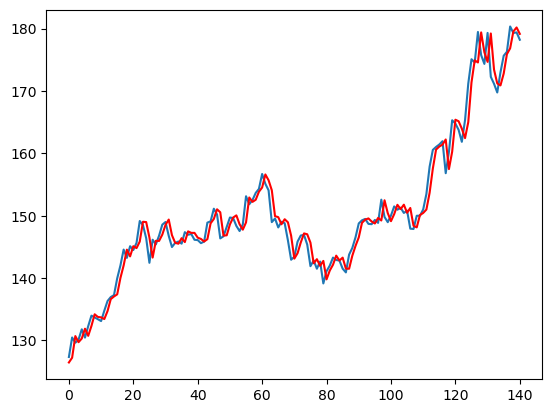

In [35]:
pyplot.plot(test_Y)
pyplot.plot(y_pred, color = 'red')

In [ ]:
# plt.figure(figsize=(14, 7))
# y_pred_series = pd.Series(y_pred, index=X_test.index)
# sns.lineplot(data=X_test[['Actual_Returns'][::5]], palette=['red'])
# sns.lineplot(data=y_pred_series, color='blue')
# plt.title(f'Apple Stock Price Prediction\nRMSE: {rmse}')
# plt.xlabel("Date")
# plt.ylabel("Returns")
# plt.legend(['Actual Returns', 'Predicted Returns'])
# plt.xlim(start, end)
# plt.show()

Time series representation of predicted returns vs actual returns